In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import matplotlib.gridspec as gridspec
from file_tools import read_mfdataset_list

# Local import 

klevel= 25




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
# Open data sets

def gather_w(dir, k, writeout=False):
    
    # get data from these levels 
    
    klevels = [k-1, k, k+1]
    
    ds  = read_mfdataset_list(dir , "region*.nc")

    # Convert to numpy arrays, fill in zeros

    w = np.nan_to_num(ds.W.isel(nz=klevels).values).astype('float64')

    nhour, nz, ny, nx = w.shape
    
    w = w.reshape(nhour*nz, ny, nx)
    
    print(w.min())

    # if writeout:
    #     save_mfdataset_list(ds, new_dir, gridType='w_kde')
    
    return w.flatten()

In [57]:
# Input data sets....

from input_kde import input_spec

input_dir  = input_spec["input_dir"]
output_dir = input_spec["output_dir"]
    
#------------------------------------------------------------------------------------
# cut and past from below here
#

print("\n====> Begin processing runs\n")

all_w = {"hrrr": np.ma.zeros((1,)), "ctrl": np.ma.zeros((1,)), "nord3": np.ma.zeros((1,)) }

for day in input_spec["cases"]:
    for run in input_spec["cases"][day]:
        
        print("\n----> Processing run: %s for day:  %s \n" % (run,day))
        run_dir = str(os.path.join(input_dir, day, run))
        out_dir = str(os.path.join(output_dir, day, run))
        wtmp = gather_w(run_dir, klevel, writeout=False)
        print(wtmp.shape)
        np.append(all_w[run], wtmp)
        
print("\n====> Ended processing runs\n")



====> Begin processing runs


----> Processing run: hrrr for day:  2019071918 

-7.168787237025484
(3776436,)

----> Processing run: ctrl for day:  2019071918 

-13.604470252990723
(3785058,)

----> Processing run: nord3 for day:  2019071918 

-12.574789047241211
(3785058,)

====> Ended processing runs



<class 'numpy.ma.core.MaskedArray'>


ValueError: array must not contain infs or NaNs

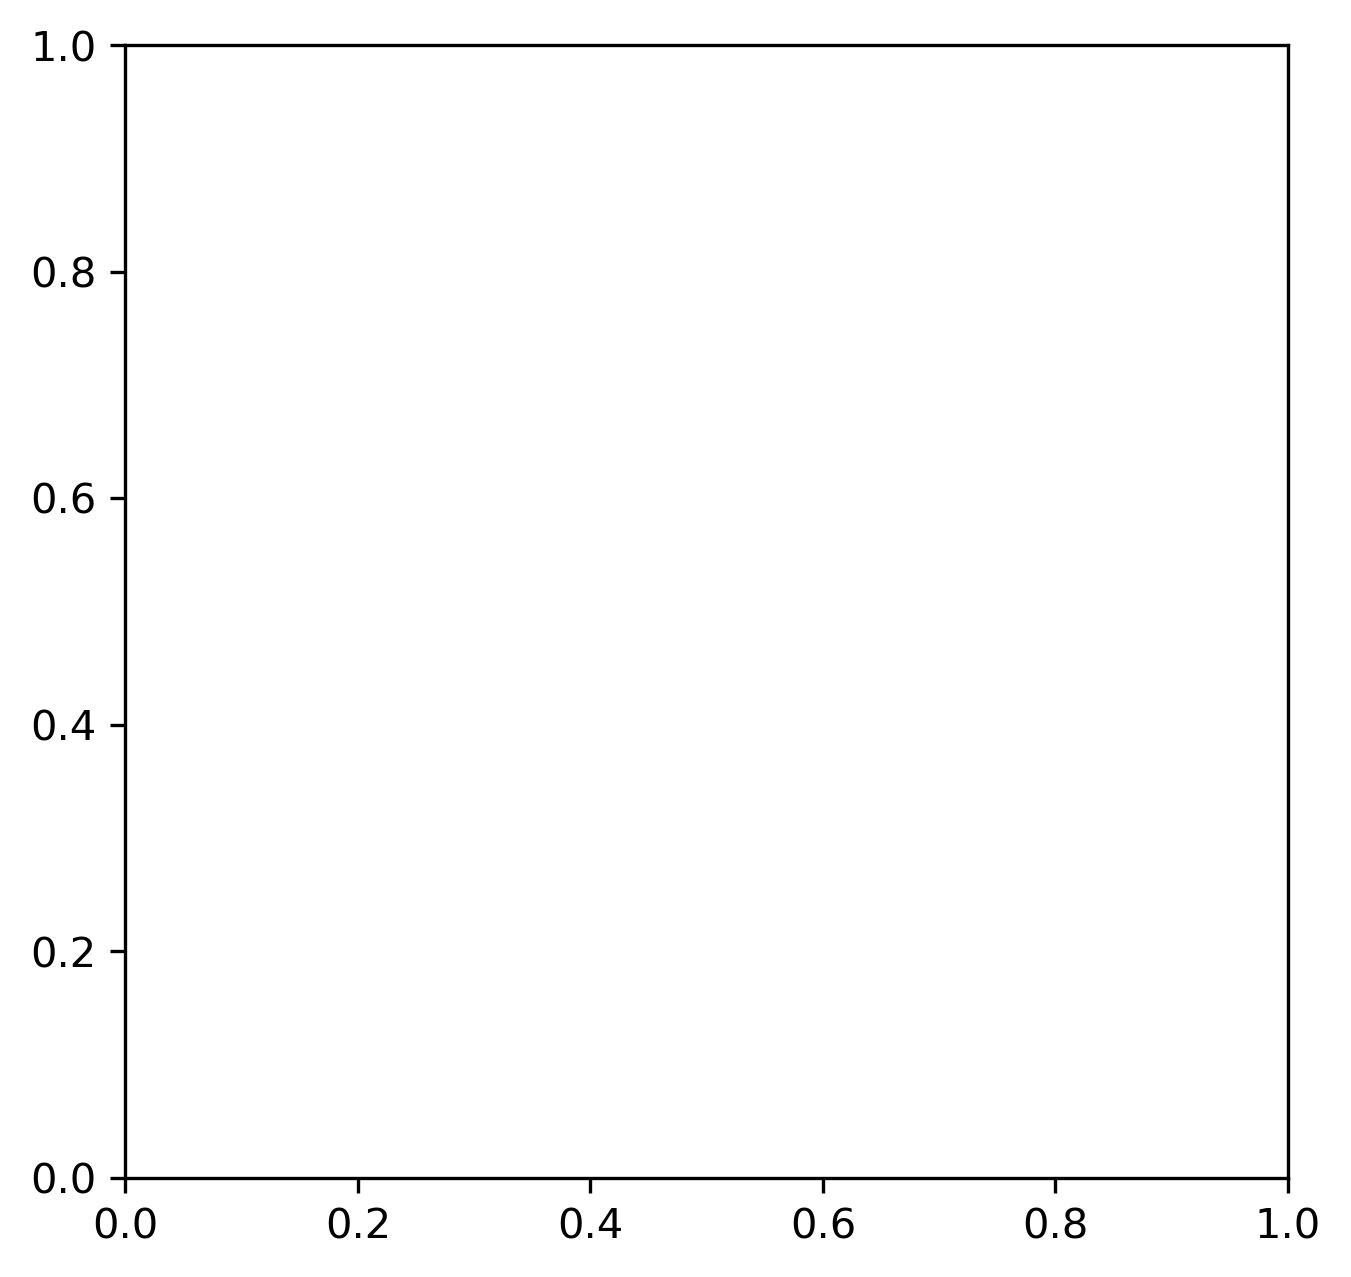

In [53]:
# Example Usage
from kdetools import *

print(type(all_w['hrrr']))

hrrr = all_w['hrrr'].filled(0.0)

f, ax = plt.subplots(dpi=300, figsize=(5,5))

cs = plot_kde_scatter(ax, hrrr, hrrr)

plt.show()





In [ ]:
all_w['hrrr'].*

In [140]:
import json

with open("sample.json", "w") as outfile:
    json.dump(input_spec, outfile)
    
import yaml
with open("sample.yaml", "w") as outfile:
    yaml.dump(input_spec, outfile)

In [141]:
with open("sample.yaml", "r") as outfile:
    d = yaml.load(outfile, Loader=yaml.FullLoader)
    
print(d)

{'cases': {'2019071918': ['hrrr', 'ctrl', 'nord3'], '2020081006': ['hrrr', 'ctrl', 'nord3']}, 'input_dir': '/Users/Louis.Wicker/CAM_Case_Studies', 'output_dir': '/Users/Louis.Wicker/CAM_Case_Studies'}


In [134]:
yaml.load?

Signature: yaml.load(stream, Loader)
Docstring:
Parse the first YAML document in a stream
and produce the corresponding Python object.
File:      ~/miniconda3/envs/mypip/lib/python3.9/site-packages/yaml/__init__.py
Type:      function


In [142]:
f = ""
print(len(f))

0
